# Credit Card Fraud Detection

## About the project

### Background

• Credit card fraud is the unauthorized use of a credit or debit card, or similar payment tool, to fraudulently obtain money or property. The purpose may be to obtain goods or services or to make payment to another account, which is controlled by a criminal

• There were nearly 400,000 reports of credit card fraud reported to the Federal Trade Commission last year, a number that grew 44% from 2019 to 2020. The key to minimizing the damage of this insidious crime is to detect it early and act immediately

### Dataset

• The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 10 months

• The data is at a customer level with 21 behavioral variables

### Goal

• Analyze and visualize credit card spending and paying data

• Build up a model to detect credit card fraud

### Data Description

• cust_id: Identification of Credit Card holder (Categorical)

• activated_date: The date customer activated their account

• last_payment_date: The date customer made their last payment

• balance: Balance amount left in their account to make purchases

• balance_frequency: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

• purchases: Amount of purchases made from account

• oneoff_purchases: Maximum purchase amount done in one-go

• insallments_purchases: Amount of purchase done in installment

• cash_advance: Cash in advance given by the user

• purchases_frequency: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

• oneoff_purchases_frequency: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

• purchases_insallments_frequency: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

• cash_advance_frequency: How frequently the cash in advance being paid

• cash_advance_trx: Number of Transactions made with "Cash in Advanced"

• purchases_trx: Number of purchase transactions made

• credit_limit: Limit of Credit Card for user

• payments: Amount of Payment done by user

• minimum_payments: Minimum amount of payments made by user

• prc_fullpayments: Percent of full payment paid by user

• tenure: Tenure of credit card service for user

• fraud: Identify if the customer is potentially fraud

### Built with

• Python, Pandas, Numpy, Seaborn, Matplotlib, Sklean

• Jupyter Notebook

### Procedures:

1. Data pre-processing and cleaning

2. Data exploration and visualiazation

3. Utilizing logistic regression to detect fraud

4. Measuring the performance of the model

### Step 1 Data pre-processing and cleaning

In [ ]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import data
df=pd.read_csv('Data_Set.csv')

In [5]:
df.head()

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,5,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.0,0.000000,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        8950 non-null   int64         
 1   cust_id                           8950 non-null   object        
 2   activated_date                    8937 non-null   datetime64[ns]
 3   last_payment_date                 8941 non-null   object        
 4   balance                           8948 non-null   float64       
 5   balance_frequency                 8950 non-null   float64       
 6   purchases                         8950 non-null   float64       
 7   oneoff_purchases                  8950 non-null   float64       
 8   installments_purchases            8950 non-null   float64       
 9   cash_advance                      8838 non-null   float64       
 10  purchases_frequency               8950 non-null 

In [7]:
df.describe()

,Unnamed: 0,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
count,8950.000000,8948.000000,8950.000000,8950.000000,8950.000000,8950.000000,8838.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8629.000000,8950.000000,8950.000000,8950.000000
mean,4475.500000,1564.612804,0.877271,1003.204834,592.437371,411.067645,978.980630,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.173246,0.153715,11.517318,0.007821
std,2583.786788,2081.735635,0.236904,2136.634782,1659.887917,904.338115,2099.762588,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2373.455761,0.292499,1.338331,0.088096
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,2238.250000,128.234272,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.079690,0.000000,12.000000,0.000000
50%,4475.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,311.963409,0.000000,12.000000,0.000000
75%,6712.750000,2054.525476,1.000000,1110.130000,577.405000,468.637500,1115.395002,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.271126,0.142857,12.000000,0.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.000000


In [8]:
#check if there is null value
df.isnull().sum()

Unnamed: 0                            0
cust_id                               0
activated_date                       13
last_payment_date                     9
balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    321
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64

In [9]:
#six columns have null value. Drop the rows or fill up the missing values with the mean of that column.
df=df[df['activated_date'].notnull()]
df=df[df['last_payment_date'].notnull()]
df.loc[(df['balance'].isnull()==True),'balance']=df['balance'].mean()
df.loc[(df['cash_advance'].isnull()==True),'cash_advance']=df['cash_advance'].mean()
df.loc[(df['credit_limit'].isnull()==True),'credit_limit']=df['credit_limit'].mean()
df.loc[(df['minimum_payments'].isnull()==True),'minimum_payments']=df['minimum_payments'].mean()

In [10]:
#check if there is null value again
df.isnull().sum()

Unnamed: 0                          0
cust_id                             0
activated_date                      0
last_payment_date                   0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
fraud                               0
dtype: int64

In [11]:
#check duplicated entries 
df.duplicated().sum()

0

In [12]:
#drop "Unnamed", "customer ID", "activated_date", and "last_payment_date" columns since we don't use it here.
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.drop("cust_id", axis = 1, inplace = True)
df.drop("activated_date", axis = 1, inplace = True)
df.drop("last_payment_date", axis = 1, inplace = True)

### Step 2 Data exploration and visualiazation 

In [13]:
#read all the columns in the dataset
df.columns

Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure', 'fraud'],
      dtype='object')

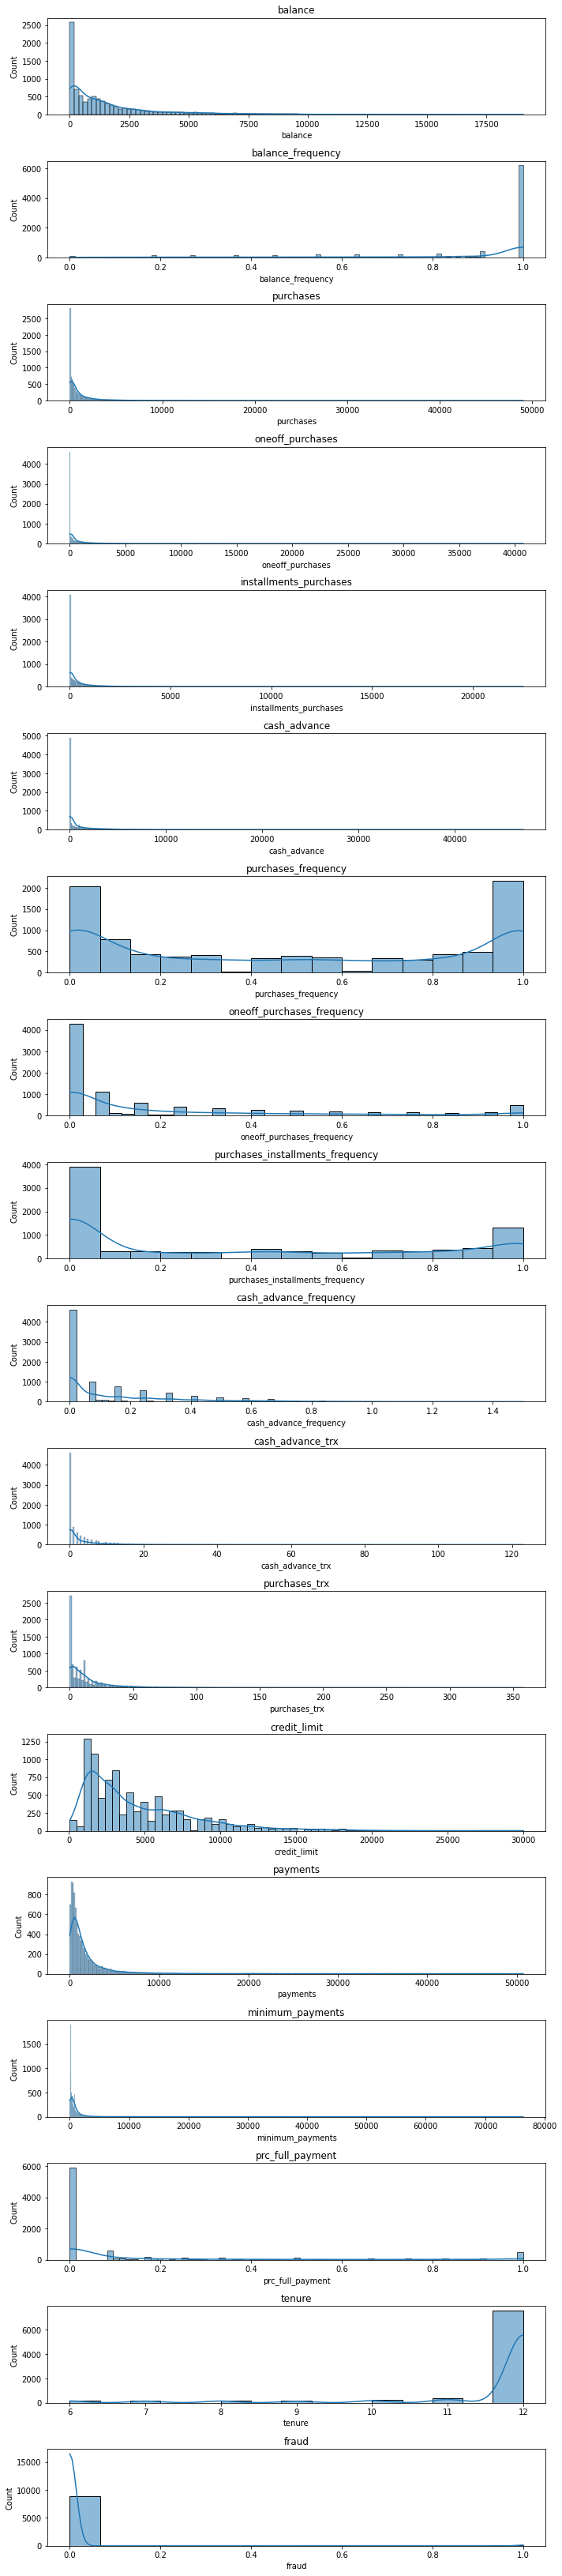

In [14]:
#plot histograms to show distributions of each column
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(20, 1, i+1)
  sns.histplot(data=df[df.columns[i]], kde=True)
  plt.title(df.columns[i])

plt.tight_layout()

<AxesSubplot:>

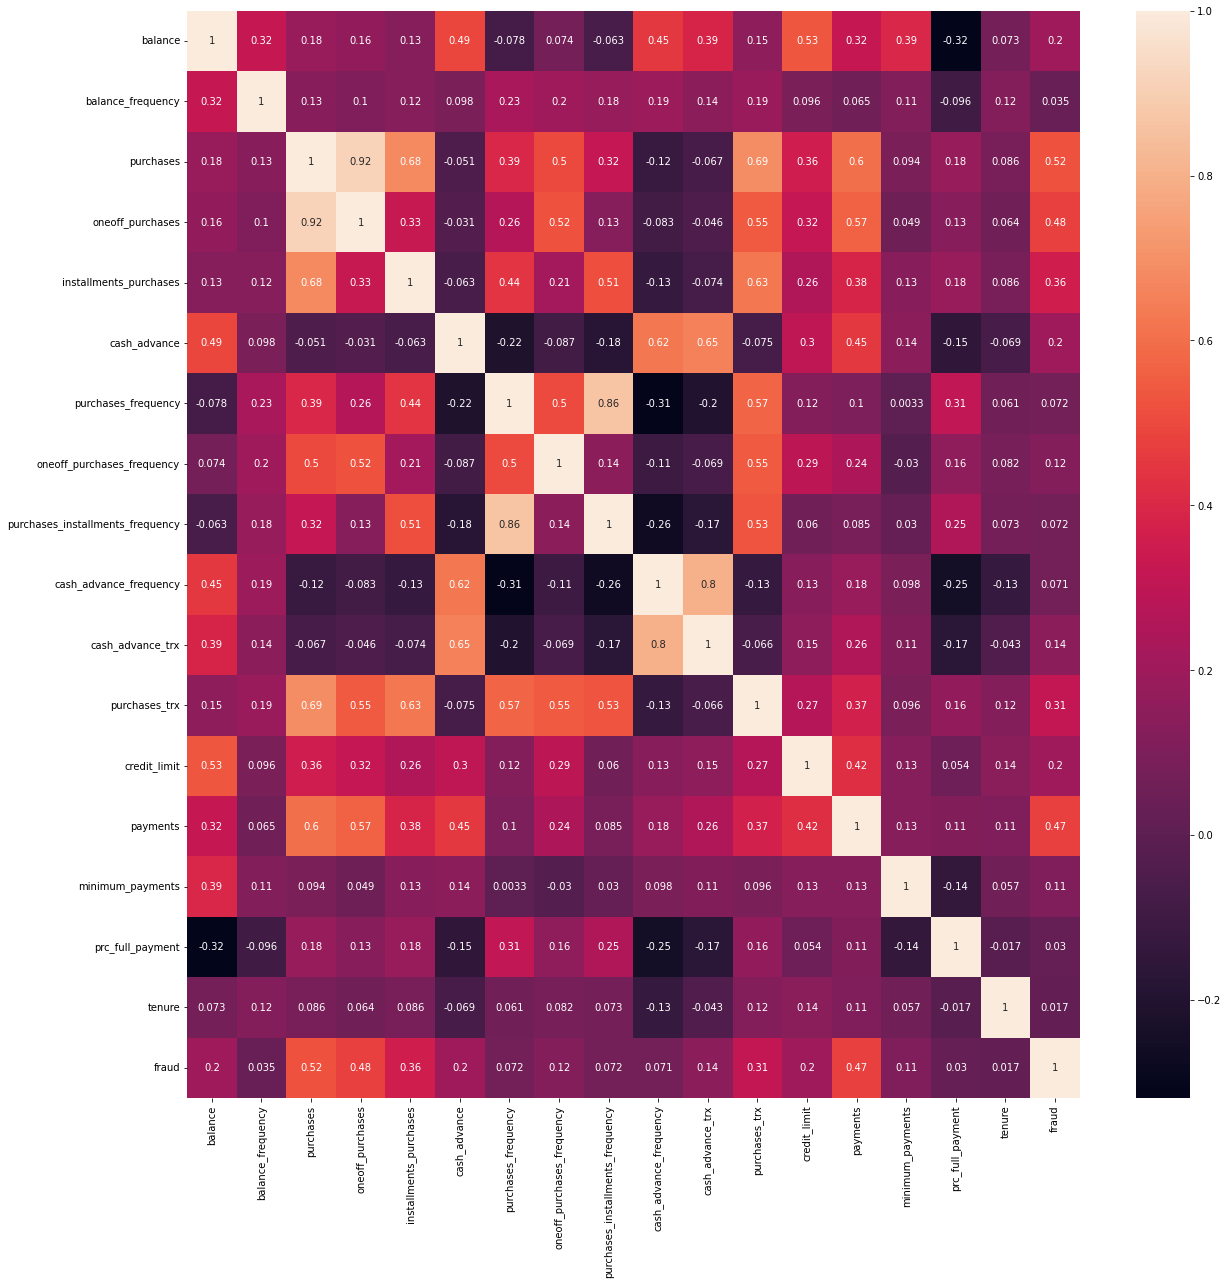

In [15]:
#check the correlations between every two columns
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

From the results, we can see 3 pairs of strong correlation:
    "purchases" and "oneoff_purchases" --> 0.92
    "purchases_frequency" and "purchases_installments_frequency" --> 0.86
    "cash_advance_trx" and "cash_advance_frequency" --> 0.8

### Step 3 Utilizing logistic regression to detect fraud

In [16]:
#set inputs and outputs
X = df.drop(['fraud'],axis = 1)  
y = df['fraud']

In [17]:
#scale the data for better result
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
d_scaled = scaler.fit_transform(X)
data_scaled1 = pd.DataFrame(d_scaled,columns = [X.columns])
data_scaled1.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.732184,-0.248973,-0.425101,-0.356930,-0.348960,-0.469222,-0.806228,-0.678176,-0.707342,-0.675514,-0.476017,-0.510958,-0.960407,-0.528781,-3.108045e-01,-0.525404,0.36102
1,0.785927,0.134662,-0.469802,-0.356930,-0.454438,2.616367,-1.221428,-0.678176,-0.917003,0.574563,0.109810,-0.591351,0.689356,0.819044,8.912748e-02,0.234709,0.36102
2,0.446289,0.518298,-0.107528,0.109277,-0.454438,-0.469222,1.269763,2.674407,-0.917003,-0.675514,-0.476017,-0.108988,0.826837,-0.383585,-1.016809e-01,-0.525404,0.36102
3,0.048473,-1.016243,0.232564,0.546940,-0.454438,-0.370669,-1.013829,-0.398795,-0.917003,-0.258824,-0.329560,-0.551155,0.826837,-0.598501,-3.411864e-16,-0.525404,0.36102
4,-0.359177,0.518298,-0.462305,-0.347282,-0.454438,-0.469222,-1.013829,-0.398795,-0.917003,-0.675514,-0.476017,-0.551155,-0.905415,-0.364145,-2.656672e-01,-0.525404,0.36102


In [18]:
#split the data to traning set and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(d_scaled,y,test_size=0.20,random_state=42)

In [19]:
#apply logistic regression algorithm to traning data
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(C=0.1)
lg_model.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Step 4 Measuring the performance of the model

In [20]:
#traning and test accuracy
print(f'Test accuracy: {lg_model.score(X_test,y_test)}')
print(f'Train accuracy: {lg_model.score(X_train,y_train)}')

Test accuracy: 0.9988801791713325
Train accuracy: 0.9967796135536264


<AxesSubplot:>

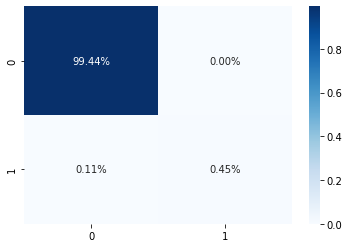

In [21]:
#evaluate the model by confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = lg_model.predict(X_test)
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [22]:
#calculate the coefficient of each variable
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': lg_model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

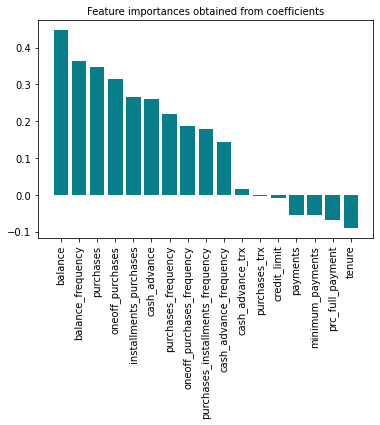

In [23]:
#plot the coefficient of each variable to show the importance
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(np.arange(17),['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure'],rotation='vertical')
plt.show()

from the above plot, balance is the most powerful variable for fraud prodiction.